# A1 INE5405 - Probabilidade e Estatística
## Análise de Dados da COVID-19 no Brasil: 2020 vs. 2024

- (a) Escolher um tema de sua área, ou de sua preferência.
- (b) Selecionar, no mínimo, seis variáveis de interesse (que englobem variáveis qualitativas e
quantitativas – pelo menos duas de cada), que devem ser descritas e classificadas na Seção
“Materiais e Métodos”. É requerido um conjunto de dados com no mínimo 30 linhas. O conjunto de
dados será escolhido pelo grupo, com acesso público (sugestão Portal Brasileiro de Dados Abertos
https://dados.gov.br/)
- (c) Definir claramente as variáveis em estudo: fazer uma breve descrição dos dados, com qual
finalidade estas variáveis foram escolhidas e classificá-las corretamente.
- (d) Construir tabelas de frequência para as variáveis de interesse e realizar discussões acerca das
mesmas.
- (e) Apresentar gráficos adequados para cada uma das variáveis, discutindo-os.
- (f) Calcular, apresentar e discutir as medidas de resumo das variáveis em questão.
- (g) Relacionar as variáveis duas a duas utilizando tabelas ou gráficos, discutindo-os.

<a href="https://colab.research.google.com/github/vishmaria/Estatistica-com-Python/blob/main/A1_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb

# Configurar pandas
pd.set_option('display.max_rows', 100)

### Dados de 2020:

In [2]:
df_20201 = pd.read_csv('data/HIST_PAINEL_COVIDBR_2020_Parte1_14set2024.csv',sep = ';')
df_20202 = pd.read_csv('data/HIST_PAINEL_COVIDBR_2020_Parte2_14set2024.csv',sep = ';')
df_2020 = pd.concat([df_20201, df_20202])

### Dados de 2024:

In [3]:
df_20241 = pd.read_csv('data/HIST_PAINEL_COVIDBR_2024_Parte1_14set2024.csv',sep = ';')
df_20242 = pd.read_csv('data/HIST_PAINEL_COVIDBR_2024_Parte2_14set2024.csv',sep = ';')
df_2024 = pd.concat([df_20241, df_20242])

### O `dataframe` final será a junção destes dados, identificando os anos pela variável de data, extraindo com `dt.year`

In [5]:

# Concatenar os dataframes
df = pd.concat([df_2020, df_2024])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3023890 entries, 0 to 427043
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          int64  
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 415.3+ MB


In [6]:
# Converter a coluna 'data' para o tipo datetime
df['data'] = pd.to_datetime(df['data'])

# Criar a variável ano para diferenciar entre 2020 e 2024
df['ano'] = df['data'].dt.year

In [7]:
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,ano
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,0.0,0.0,NaN,2020
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,1.0,0.0,NaN,2020
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,1.0,0.0,NaN,2020
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,0.0,1.0,NaN,2020
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,1.0,1.0,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427039,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2024-09-10,37,3015268.0,952363,0,12014,0,NaN,NaN,1.0,2024
427040,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2024-09-11,37,3015268.0,952363,0,12014,0,NaN,NaN,1.0,2024
427041,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2024-09-12,37,3015268.0,952363,0,12014,0,NaN,NaN,1.0,2024
427042,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2024-09-13,37,3015268.0,952363,0,12014,0,NaN,NaN,1.0,2024


## Variáveis escolhidas:
- data (para ordenação)
- regiao
- estado
- municipio 
- populacaoTCU
- obitosAcumulado
- obitosNovos
- ano (para comparação)

In [8]:
df = df[[
    'data',
    'regiao',
    'estado',
    'municipio',
    'populacaoTCU2019',
    'obitosAcumulado',
    'obitosNovos',
    'ano'
]]
df = df.drop_duplicates()

## Análise exploratória

### Dados faltantes

In [9]:
df.stb.missing(style=True)

,missing,total,percent
municipio,"27,230","3,023,890",0.90%
populacaoTCU2019,"11,298","3,023,890",0.37%
estado,569,"3,023,890",0.02%
regiao,0,"3,023,890",0.00%
data,0,"3,023,890",0.00%
obitosAcumulado,0,"3,023,890",0.00%
obitosNovos,0,"3,023,890",0.00%
ano,0,"3,023,890",0.00%


In [10]:
# Remover valores faltantes
df = df.dropna(subset=['municipio','estado'])
df.shape

(2996660, 8)

In [11]:
df = df[df['regiao'] != 'Brasil']
df.shape

(2996660, 8)

### Tabelas de frequência

In [12]:
df.stb.freq(['regiao'], style=True)

,regiao,count,percent,cumulative_count,cumulative_percent
0,Nordeste,"965,172",32.21%,"965,172",32.21%
1,Sudeste,"897,384",29.95%,"1,862,556",62.15%
2,Sul,"640,758",21.38%,"2,503,314",83.54%
3,Centro-Oeste,"251,246",8.38%,"2,754,560",91.92%
4,Norte,"242,100",8.08%,"2,996,660",100.00%


In [13]:
df.stb.freq(['estado'], style=True)

,estado,count,percent,cumulative_count,cumulative_percent
0,MG,"458,914",15.31%,"458,914",15.31%
1,SP,"347,010",11.58%,"805,924",26.89%
2,RS,"267,386",8.92%,"1,073,310",35.82%
3,BA,"224,346",7.49%,"1,297,656",43.30%
4,PR,"214,662",7.16%,"1,512,318",50.47%
5,SC,"158,710",5.30%,"1,671,028",55.76%
6,GO,"132,348",4.42%,"1,803,376",60.18%
7,PI,"120,512",4.02%,"1,923,888",64.20%
8,PB,"119,974",4.00%,"2,043,862",68.20%
9,MA,"116,746",3.90%,"2,160,608",72.10%


In [14]:
# Tabela de frequência para a variável 'regiao' e total de óbitos
df[df['data'] == '2024-09-14'].stb.freq(['regiao'],value='obitosAcumulado',style=True)

,regiao,obitosAcumulado,percent,cumulative_obitosAcumulado,cumulative_percent
0,Sudeste,"343,673",48.25%,"343,673",48.25%
1,Nordeste,"136,564",19.17%,"480,237",67.42%
2,Sul,"112,836",15.84%,"593,073",83.26%
3,Centro-Oeste,"67,148",9.43%,"660,221",92.69%
4,Norte,"52,066",7.31%,"712,287",100.00%


In [15]:
df[df['data'] == '2024-09-14'].obitosAcumulado.sum()

np.int64(712287)

In [16]:
# Obitos em 2020 por regiao
df[df['ano'] == 2020].stb.freq(['regiao'], value='obitosNovos',style=True)

,regiao,obitosNovos,percent,cumulative_obitosNovos,cumulative_percent
0,Sudeste,"89,072",45.76%,"89,072",45.76%
1,Nordeste,"47,676",24.49%,"136,748",70.25%
2,Sul,"22,037",11.32%,"158,785",81.57%
3,Norte,"18,019",9.26%,"176,804",90.83%
4,Centro-Oeste,"17,848",9.17%,"194,652",100.00%


In [17]:
# Obitos em 2024 por regiao
df[df['ano'] == 2024].stb.freq(['regiao'], value='obitosNovos',style=True)

,regiao,obitosNovos,percent,cumulative_obitosNovos,cumulative_percent
0,Sudeste,"2,689",58.88%,"2,689",58.88%
1,Sul,688,15.06%,"3,377",73.94%
2,Nordeste,498,10.90%,"3,875",84.85%
3,Centro-Oeste,428,9.37%,"4,303",94.22%
4,Norte,264,5.78%,"4,567",100.00%


In [18]:
df[df['ano'] == 2020].obitosNovos.sum()

np.int64(194652)

In [19]:
df[df['ano'] == 2024].obitosNovos.sum()

np.int64(4567)

In [20]:
# Total de obitos por estado
df[df['data'] == '2024-09-14'].stb.freq(['estado'],value='obitosAcumulado',style=True)

,estado,obitosAcumulado,percent,cumulative_obitosAcumulado,cumulative_percent
0,SP,"183,849",25.81%,"183,849",25.81%
1,RJ,"78,198",10.98%,"262,047",36.79%
2,MG,"66,698",9.36%,"328,745",46.15%
3,PR,"46,710",6.56%,"375,455",52.71%
4,RS,"43,007",6.04%,"418,462",58.75%
5,BA,"31,656",4.44%,"450,118",63.19%
6,GO,"28,619",4.02%,"478,737",67.21%
7,CE,"28,215",3.96%,"506,952",71.17%
8,PE,"23,240",3.26%,"530,192",74.44%
9,SC,"23,119",3.25%,"553,311",77.68%


In [21]:
# Total de obitos por estado em 2020
df[df['ano'] == 2020].stb.freq(['estado'],value='obitosNovos',style=True)

,estado,obitosNovos,percent,cumulative_obitosNovos,cumulative_percent
0,SP,"46,717",24.00%,"46,717",24.00%
1,RJ,"25,530",13.12%,"72,247",37.12%
2,MG,"11,804",6.06%,"84,051",43.18%
3,CE,"9,990",5.13%,"94,041",48.31%
4,PE,"9,654",4.96%,"103,695",53.27%
5,BA,"9,065",4.66%,"112,760",57.93%
6,RS,"8,872",4.56%,"121,632",62.49%
7,PR,"7,912",4.06%,"129,544",66.55%
8,PA,"7,188",3.69%,"136,732",70.24%
9,GO,"6,805",3.50%,"143,537",73.74%


In [22]:
# Total de obitos por estado em 2024
df[df['ano'] == 2024].stb.freq(['estado'],value='obitosNovos',style=True)

,estado,obitosNovos,percent,cumulative_obitosNovos,cumulative_percent
0,SP,"1,595",34.92%,"1,595",34.92%
1,MG,602,13.18%,"2,197",48.11%
2,RJ,433,9.48%,"2,630",57.59%
3,RS,361,7.90%,"2,991",65.49%
4,PR,201,4.40%,"3,192",69.89%
5,GO,172,3.77%,"3,364",73.66%
6,BA,160,3.50%,"3,524",77.16%
7,SC,126,2.76%,"3,650",79.92%
8,PA,123,2.69%,"3,773",82.61%
9,MS,102,2.23%,"3,875",84.85%


In [23]:
# Total de obitos por municipio (top 10)
df[df['data'] == '2024-09-14'].stb.freq(['municipio'],value='obitosAcumulado',thresh = 22,style=True)

,municipio,obitosAcumulado,percent,cumulative_obitosAcumulado,cumulative_percent
0,São Paulo,"46,024",6.46%,"46,024",6.46%
1,Rio de Janeiro,"38,661",5.43%,"84,685",11.89%
2,Brasília,"12,014",1.69%,"96,699",13.58%
3,Fortaleza,"11,818",1.66%,"108,517",15.24%
4,Manaus,"9,966",1.40%,"118,483",16.63%
5,Salvador,"9,222",1.29%,"127,705",17.93%
6,Curitiba,"8,929",1.25%,"136,634",19.18%
7,Belo Horizonte,"8,671",1.22%,"145,305",20.40%
8,Goiânia,"8,167",1.15%,"153,472",21.55%
9,others,"558,815",78.45%,"712,287",100.00%


# Gráficos

In [24]:
q1 = df['obitosAcumulado'].quantile(0.25)
q3 = df['obitosAcumulado'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df_plot_acc = df[(df['obitosAcumulado'] > lower_bound) & (df['obitosAcumulado'] < upper_bound)]


In [25]:
q1 = df['obitosNovos'].quantile(0.25)
q3 = df['obitosNovos'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df_plot_new = df[(df['obitosNovos'] > lower_bound) & (df['obitosNovos'] < upper_bound)]

In [26]:
# Boxplot para a variável 'obitosAcumulado'
# plt.figure(figsize=(12,6))
# ax = sns.boxplot(data=df, y='obitosAcumulado',hue='ano')
# plt.show()

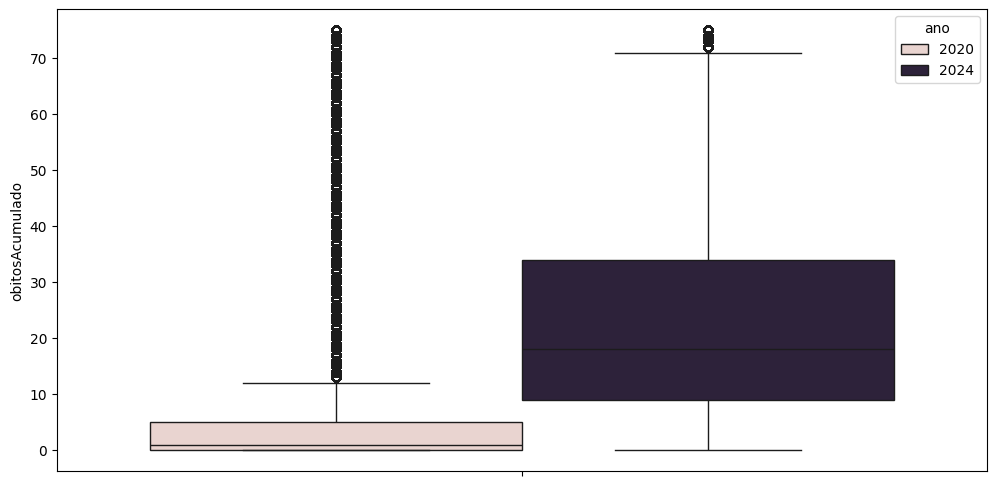

In [27]:
# Boxplot para a variável 'obitosAcumulado' removendo os outliers com iqr
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df_plot_acc, 
                 y='obitosAcumulado',hue='ano')
plt.show()

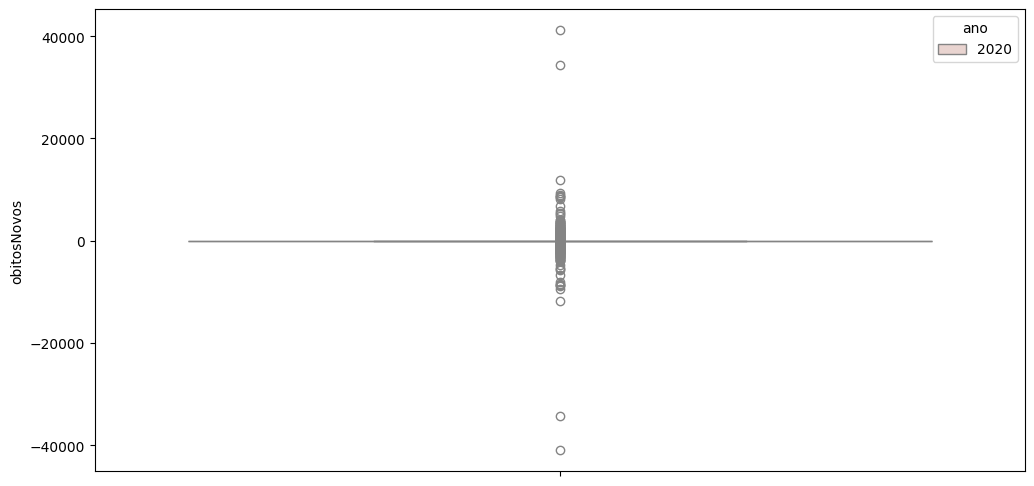

In [28]:
# Boxplot para a variável 'obitosNovos' em 2020 
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df[df['ano'] == 2020], 
                 y='obitosNovos',hue='ano')
plt.show()

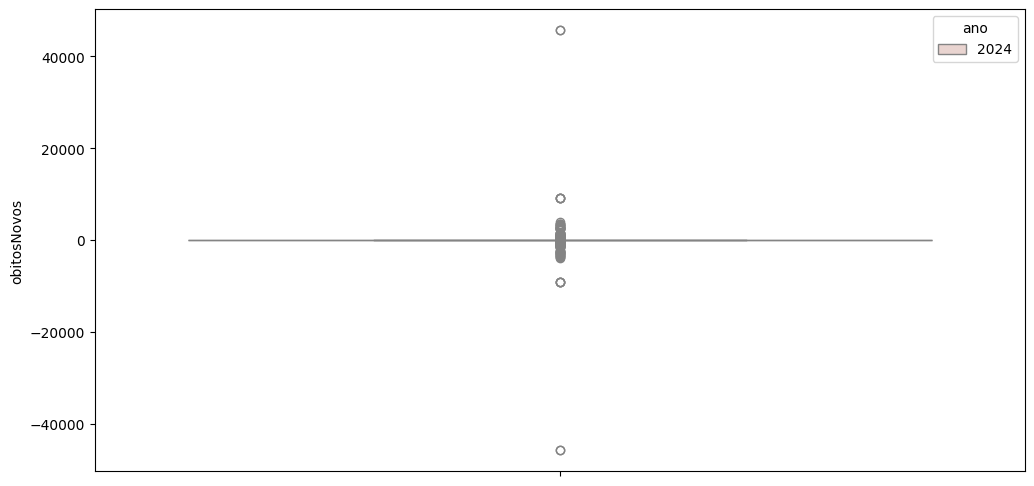

In [29]:
# Boxplot para a variável 'obitosNovos' em 2020 
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df[df['ano'] == 2024], 
                 y='obitosNovos',hue='ano')

plt.show()

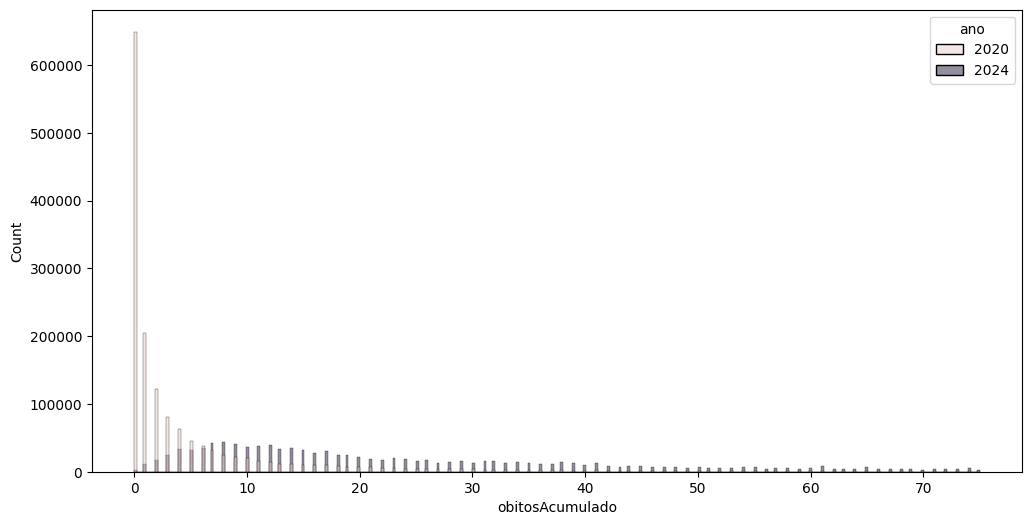

In [30]:
# Histograma para a variável 'obitosAcumulado' (sem outliers)
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df_plot_acc, x='obitosAcumulado',hue='ano',stat='count')
plt.show()



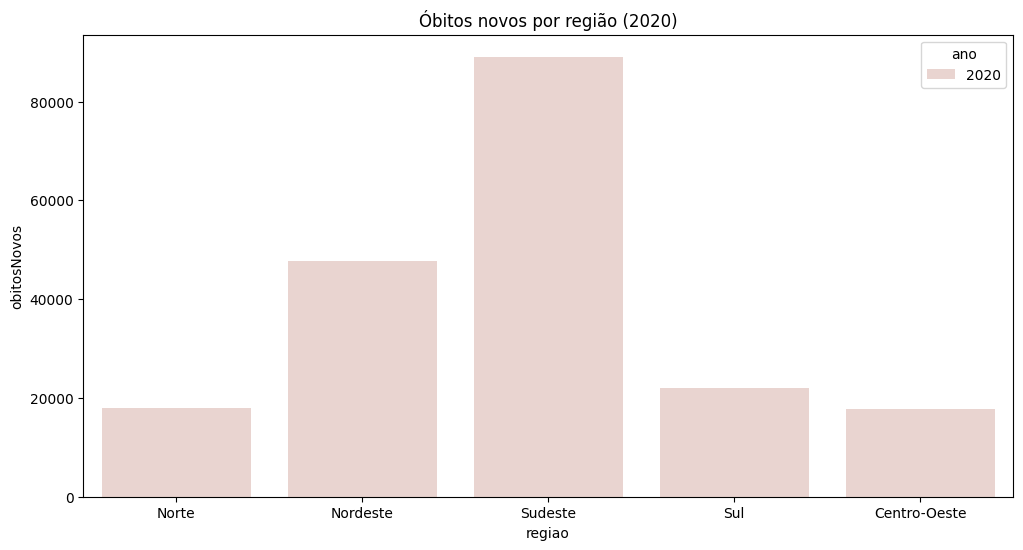

In [31]:
# Gráfico de barras para a variável 'obitosNovos' por região (2020)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df[df['ano'] == 2020], x='regiao', y='obitosNovos',estimator=sum,errorbar=None,hue='ano')
plt.title('Óbitos novos por região (2020)')
plt.show()




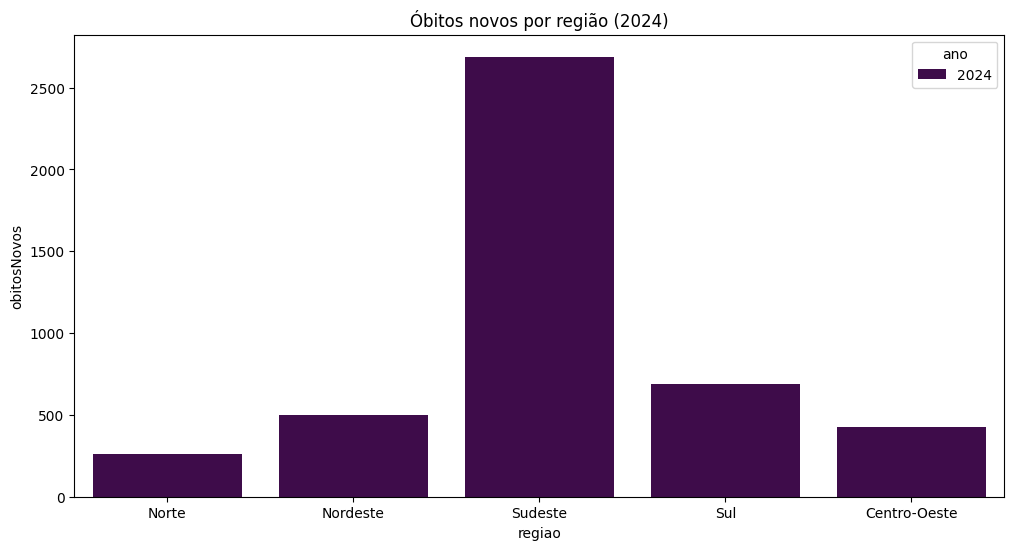

In [32]:
# Grafico de barras para a variável 'obitosNovos' por região (2024)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df[df['ano'] == 2024], x='regiao', y='obitosNovos',estimator=sum,errorbar=None,hue='ano',palette='viridis')

plt.title('Óbitos novos por região (2024)')
plt.show()

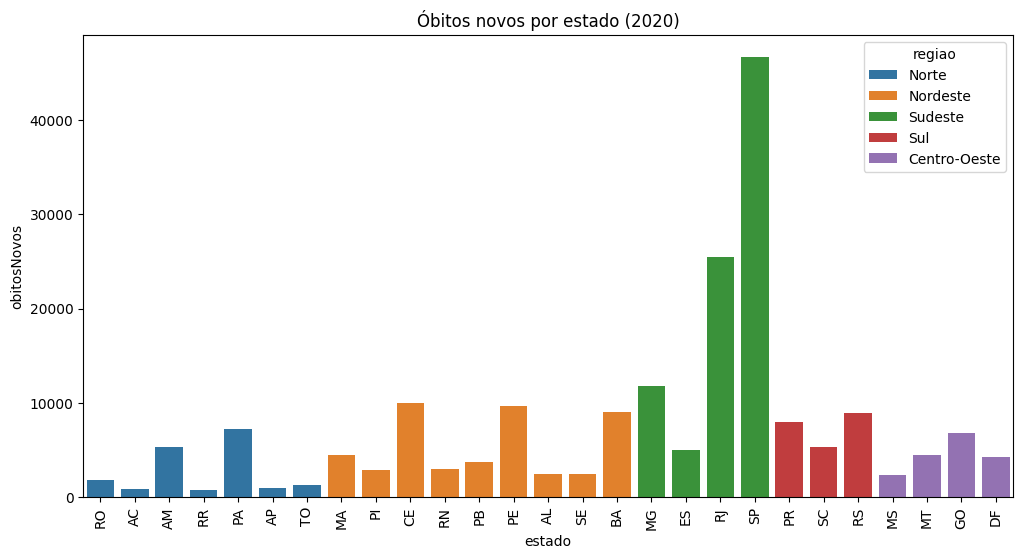

In [33]:
# Grafico de barras para a variável 'obitosNovos' por estado (2020)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df[df['ano'] == 2020], x='estado', y='obitosNovos',estimator=sum,errorbar=None,hue='regiao')
plt.title('Óbitos novos por estado (2020)')
plt.xticks(rotation=90)
plt.show()

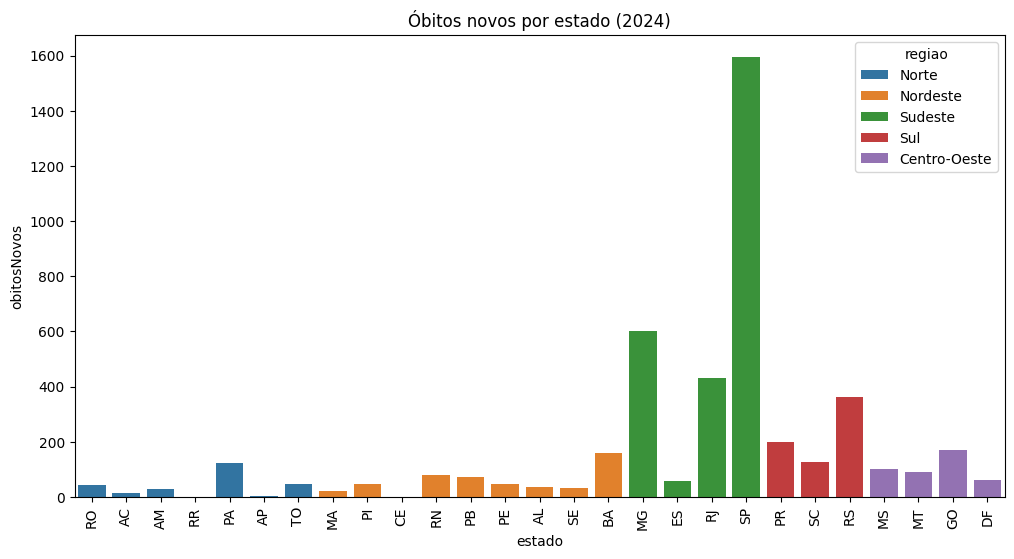

In [34]:
# Grafico de barras para a variável 'obitosNovos' por estado (2024)
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df[df['ano'] == 2024], x='estado', y='obitosNovos',estimator=sum,errorbar=None,hue='regiao')
plt.title('Óbitos novos por estado (2024)')
plt.xticks(rotation=90)
plt.show()

In [35]:
df['mes'] = df['data'].dt.month_name()


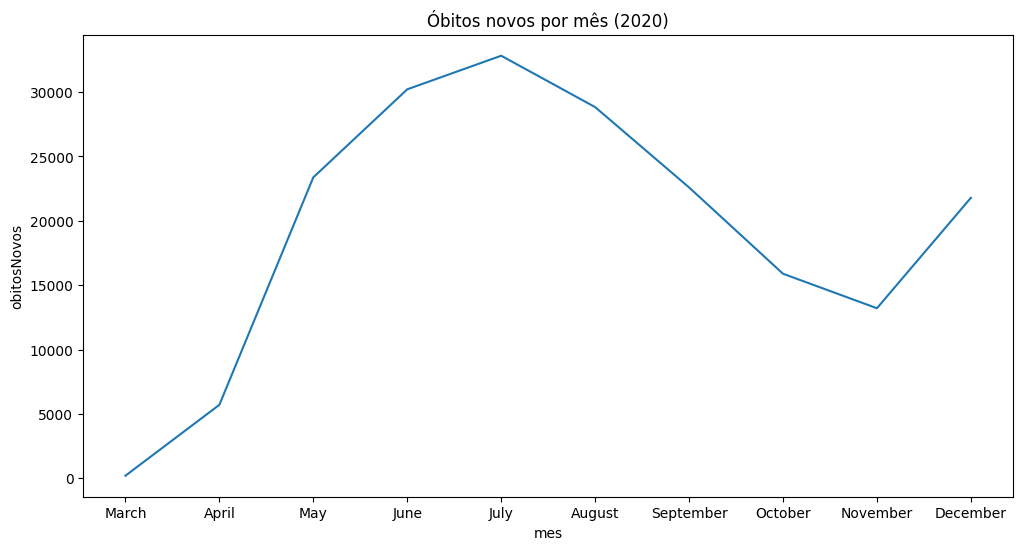

In [36]:
# Gráfico de linhas para a variável 'obitosNovos' de janeiro a dezembro de 2020
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df[df['ano'] == 2020], x='mes', y='obitosNovos',estimator=sum,errorbar=None)
plt.title('Óbitos novos por mês (2020)')
plt.show()



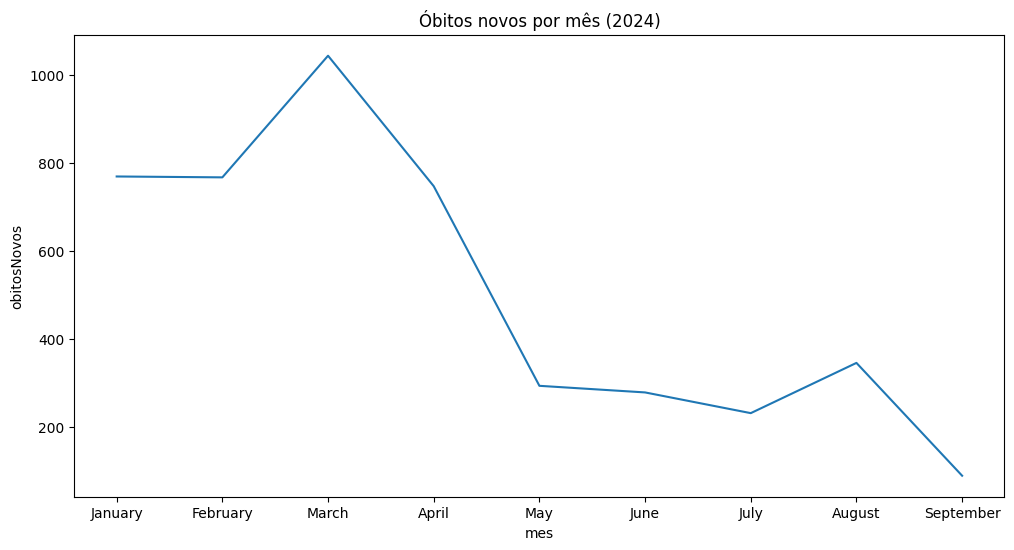

In [37]:
# Gráfico de linhas para a variável 'obitosNovos' de janeiro a dezembro de 2024
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df[df['ano'] == 2024], x='mes', y='obitosNovos',estimator=sum,errorbar=None)
plt.title('Óbitos novos por mês (2024)')
plt.show()

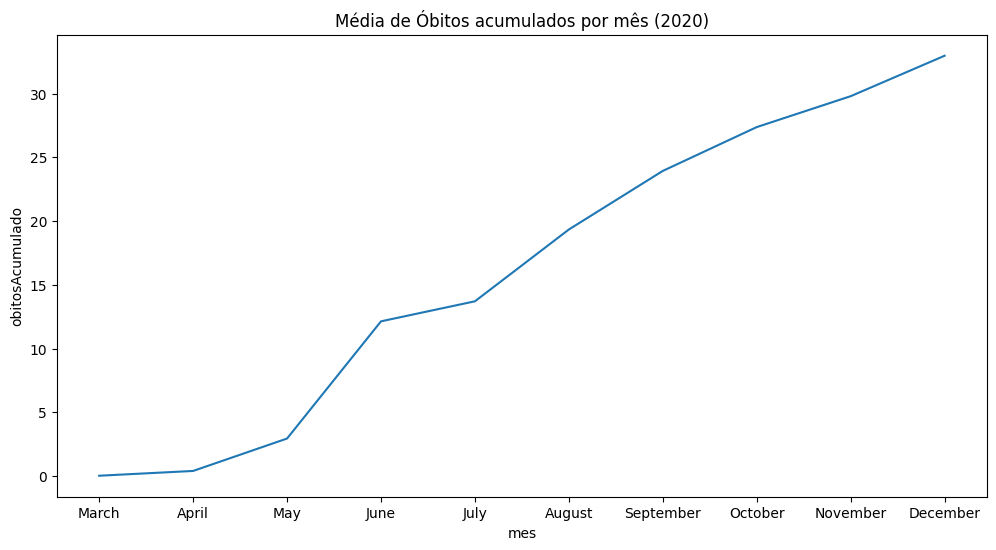

In [38]:
# Gráfico de linhas para a variável 'obitos acumulados' de janeiro a dezembro de 2020
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df[df['ano'] == 2020], x='mes', y='obitosAcumulado',estimator='mean',errorbar=None)
plt.title('Média de Óbitos acumulados por mês (2020)')
plt.show()

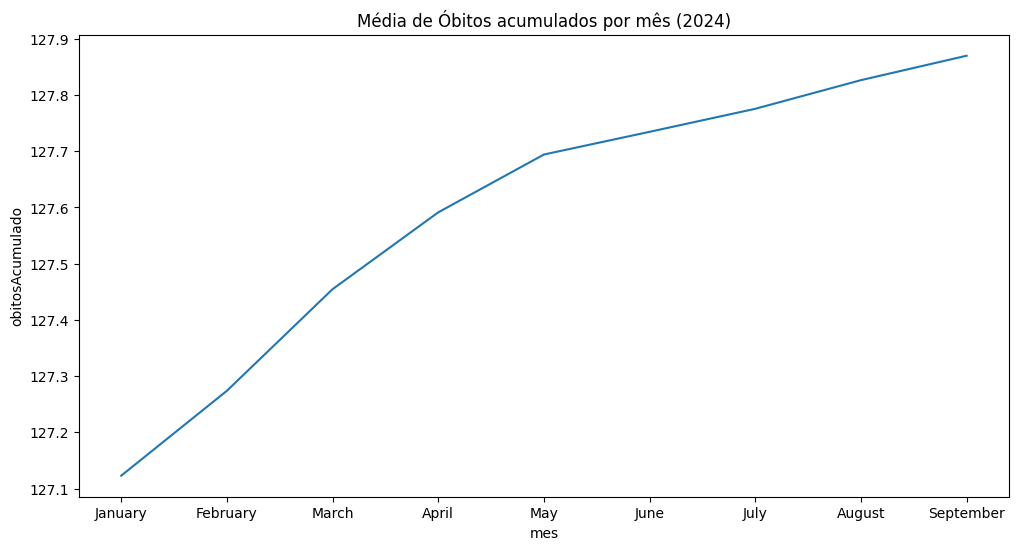

In [39]:
# Gráfico de linhas para a variável 'obitos acumulados' de janeiro a dezembro de 2024
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df[df['ano'] == 2024], x='mes', y='obitosAcumulado',estimator='mean',errorbar=None)
plt.title('Média de Óbitos acumulados por mês (2024)')
plt.show()

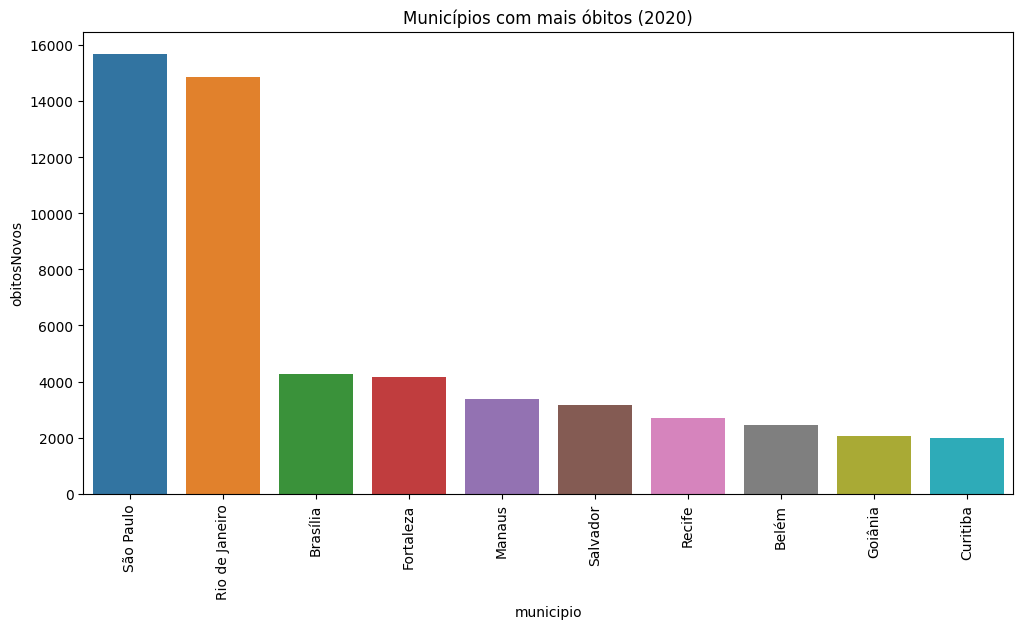

In [40]:
# Plot de muncipios com mais casos
top_mun_2020 = df[df['ano'] == 2020].groupby('municipio').agg({'obitosNovos':'sum'}).nlargest(10,'obitosNovos')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_mun_2020.reset_index(), x='municipio', y='obitosNovos',hue='municipio')
plt.title('Municípios com mais óbitos (2020)')
plt.xticks(rotation=90)
plt.show()

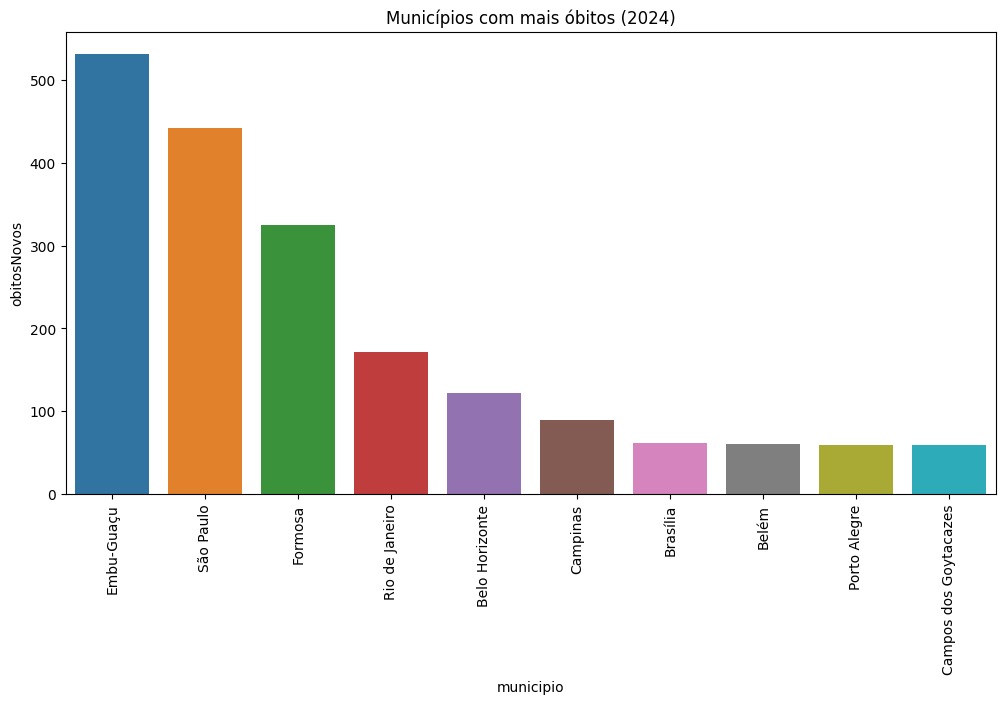

In [41]:
# Plot de muncipios com mais casos
top_mun_2024 = df[df['ano'] == 2024].groupby('municipio').agg({'obitosNovos':'sum'}).nlargest(10,'obitosNovos')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_mun_2024.reset_index(), x='municipio', y='obitosNovos',hue='municipio')
plt.title('Municípios com mais óbitos (2024)')
plt.xticks(rotation=90)
plt.show()

## Estatística descritiva

In [42]:
df[['obitosAcumulado','obitosNovos']].describe()

,obitosAcumulado,obitosNovos
count,2.996660e+06,2.996660e+06
mean,7.042710e+01,6.648035e-02
std,6.687656e+02,7.655450e+01
min,0.000000e+00,-4.567100e+04
25%,1.000000e+00,0.000000e+00
50%,8.000000e+00,0.000000e+00
75%,3.100000e+01,0.000000e+00
max,4.602400e+04,4.567100e+04


In [43]:
df[df['ano'] == 2020][['obitosAcumulado','obitosNovos']].describe()

,obitosAcumulado,obitosNovos
count,1.559600e+06,1.559600e+06
mean,1.776725e+01,1.248089e-01
std,2.168569e+02,7.231061e+01
min,0.000000e+00,-4.095300e+04
25%,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00
75%,6.000000e+00,0.000000e+00
max,4.585400e+04,4.118000e+04


In [44]:
df[df['ano'] == 2024][['obitosAcumulado','obitosNovos']].describe()

,obitosAcumulado,obitosNovos
count,1.437060e+06,1.437060e+06
mean,1.275773e+02,3.178016e-03
std,9.355853e+02,8.090876e+01
min,0.000000e+00,-4.567100e+04
25%,1.200000e+01,0.000000e+00
50%,2.600000e+01,0.000000e+00
75%,6.400000e+01,0.000000e+00
max,4.602400e+04,4.567100e+04


In [45]:
# óbitos por municipio em 2020
top_mun_2020

,obitosNovos
municipio,
São Paulo,15679
Rio de Janeiro,14860
Brasília,4259
Fortaleza,4153
Manaus,3380
Salvador,3172
Recife,2695
Belém,2459
Goiânia,2073


In [46]:
# óbitos por municipio em 2024

top_mun_2024

,obitosNovos
municipio,
Embu-Guaçu,531
São Paulo,442
Formosa,325
Rio de Janeiro,172
Belo Horizonte,122
Campinas,90
Brasília,62
Belém,61
Porto Alegre,60


In [47]:
# Calcular percentual de obitos por municipio (obitosAcumulado/populacaoTCU2019)
df['percentual_obitos'] = df['obitosNovos']/df['populacaoTCU2019']
df['percentual_obitos'] = df['percentual_obitos']*100

# Agrupar por municipio e selecionar os top 10
top_mun_2020 = df[df['ano'] == 2020].groupby('municipio').agg({'percentual_obitos':'sum'}).nlargest(10,'percentual_obitos').reset_index()
top_mun_2020

,municipio,percentual_obitos
0,Bom Jesus,0.408161
1,Guaraíta,0.350701
2,Água Branca,0.348378
3,São Francisco,0.340126
4,Charrua,0.335468
5,Belém,0.334217
6,Itambé,0.311979
7,Areia Branca,0.309491
8,Bálsamo,0.297750
9,Sapucaia,0.292382


In [48]:
# Calcular percentual de obitos por municipio (obitosAcumulado/populacaoTCU2019)
df['percentual_obitos'] = df['obitosAcumulado']/df['populacaoTCU2019']
df['percentual_obitos'] = df['percentual_obitos']*100

# Agrupar por municipio e selecionar os top 10
top_mun_2024 = df[df['data'] == '2024-09-14'].groupby('municipio').agg({'percentual_obitos':'max'}).nlargest(10,'percentual_obitos').reset_index()
top_mun_2024


,municipio,percentual_obitos
0,Santa Rita d'Oeste,2.001601
1,Estrela do Norte,1.482285
2,Santa Clara d'Oeste,1.229314
3,Embu-Guaçu,1.116956
4,Meridiano,1.094891
5,Parisi,0.925497
6,Campos Verdes,0.887436
7,Pirapó,0.868056
8,Itaúba,0.867964
9,Macedônia,0.865333


In [51]:
## Exportar aquivo com tratamento e análises
df.to_parquet('data/a1_dados_covid.parquet')